<a href="https://colab.research.google.com/github/sabbir2014/CSE498R-Medical-Insurance-Cost-Prediction/blob/master/Copy_of_medical_insurance_cost_prediction_cse498r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.svm import SVR #Support Vector Regression
from sklearn.linear_model import Ridge #Ridge Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

import warnings
warnings.filterwarnings('ignore')

Data Collection & Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/drive/MyDrive/cse498r/insurance/insurance.csv')

In [ ]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical** **Features**:
- Sex
- Smoker
- Region

In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data** **Analysis**

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


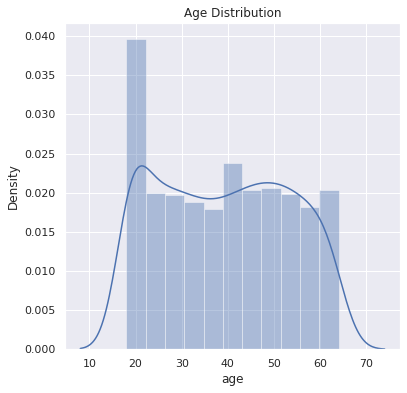

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

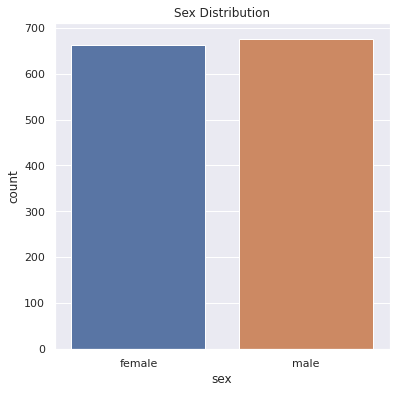

In [ ]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [ ]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

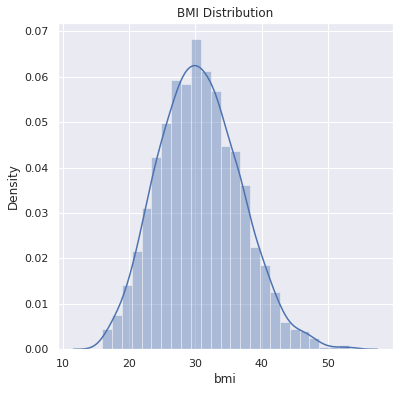

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

**Normal BMI Range --> 18.5 to 24.9**

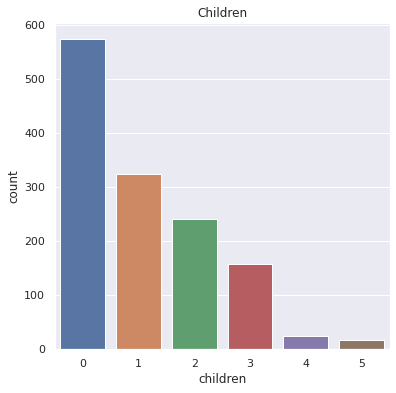

In [ ]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

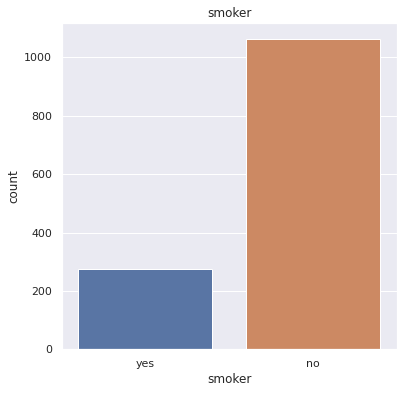

In [ ]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

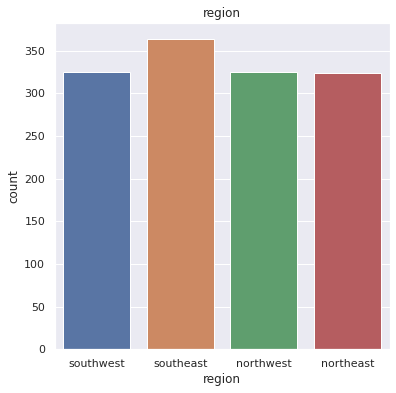

In [ ]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

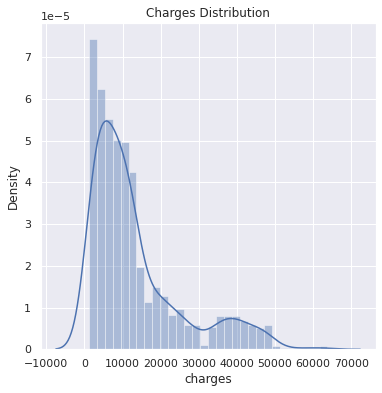

In [ ]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

**Data Pre-Processing**

**Encoding the categorical features**

In [ ]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

**Splitting the Features and Target**

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Splitting the data into Training data & Testing Data**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1338, 6) (1070, 6) (268, 6) (1070,) (268,)


In [ ]:
corr = X_train.corr()
corr


,age,sex,bmi,children,smoker,region
age,1.000000,0.004995,0.107406,0.024233,0.025651,0.000087
sex,0.004995,1.000000,-0.078914,-0.005907,0.066971,0.005744
bmi,0.107406,-0.078914,1.000000,0.001757,-0.000701,-0.267496
children,0.024233,-0.005907,0.001757,1.000000,-0.009240,0.032898
smoker,0.025651,0.066971,-0.000701,-0.009240,1.000000,0.046872
region,0.000087,0.005744,-0.267496,0.032898,0.046872,1.000000


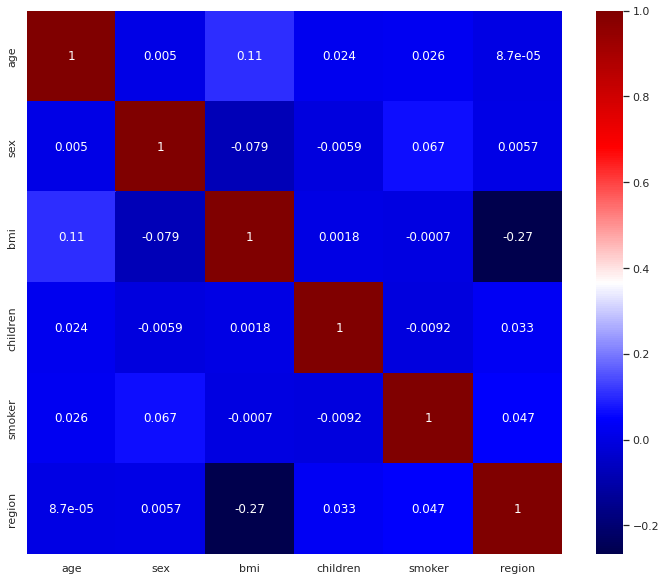

In [ ]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

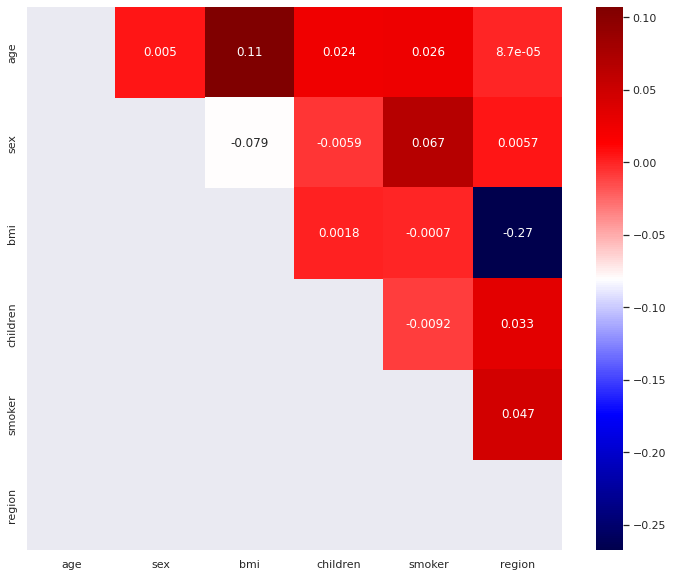

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2);

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.90) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [ ]:
def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'max_features' : ['auto', 'sqrt', 'log2'],
                'splitter': ['best','random'],
                'max_depth': range(1,25,1)
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                'n_estimators': range(30,100,5)
            }
        },
        'SVR': {
            'model' : SVR(),
            'params': {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma': ['scale', 'auto']
            }
        },
        'Ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [1.0, 2.0],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
            }
        },
        'XGBoost': {
            'model': XGBRegressor(objective ='reg:squarederror'),
            'params': {
                'criterion' : ['mse','friedman_mse','mae'],
                #'objective' : 'reg:squarederror',
                'n_estimators': range(30,100,5),
                'max_depth': range(1,6,1),
                'eta' : [0.1,0.01],
                'colsample_bytree' : np.linspace(0,1,10,endpoint=False)
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

a = find_best_model_using_gridsearchcv(X,Y)
a.head()

,model,best_score,best_params
0,linear_regression,0.737543,{'normalize': True}
1,lasso,0.737547,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.838647,"{'criterion': 'mse', 'max_depth': 5, 'max_feat..."
3,random_forest,0.827735,"{'criterion': 'mse', 'n_estimators': 75}"
4,SVR,0.799012,"{'gamma': 'auto', 'kernel': 'poly'}"


In [ ]:
linear_regression_params = a['best_params'][0]
lasso_best_params = a['best_params'][1]
decision_tree_best_params = a['best_params'][2]
random_forest_best_params = a['best_params'][3]
SVR_best_params = a['best_params'][4]
Ridge_best_params = a['best_params'][5]
xg_boost_best_params = a['best_params'][6]
print(linear_regression_params)
print(lasso_best_params)
print(decision_tree_best_params)
print(random_forest_best_params)
print(SVR_best_params)
print(Ridge_best_params)
print(xg_boost_best_params)

{'normalize': True}
{'alpha': 2, 'selection': 'random'}
{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
{'criterion': 'mse', 'n_estimators': 75}
{'gamma': 'auto', 'kernel': 'poly'}
{'alpha': 1.0, 'solver': 'sag'}
{'colsample_bytree': 0.9, 'criterion': 'mse', 'eta': 0.1, 'max_depth': 3, 'n_estimators': 55}


In [ ]:
a.tail()

,model,best_score,best_params
2,decision_tree,0.838647,"{'criterion': 'mse', 'max_depth': 5, 'max_feat..."
3,random_forest,0.827735,"{'criterion': 'mse', 'n_estimators': 75}"
4,SVR,0.799012,"{'gamma': 'auto', 'kernel': 'poly'}"
5,Ridge,0.737474,"{'alpha': 1.0, 'solver': 'sag'}"
6,XGBoost,0.850212,"{'colsample_bytree': 0.9, 'criterion': 'mse', ..."


In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# Scoring Parameters
scoring = ['r2','neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_median_absolute_error']
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)



# Linear Regression
linear_regression_score = cross_validate(LinearRegression(normalize =  linear_regression_params['normalize']), X, Y, scoring=scoring, cv=cv)

# Lasso Regresion
lasso_score = cross_validate(Lasso(alpha=lasso_best_params['alpha'], selection=lasso_best_params['selection']), X, Y, scoring=scoring, cv=cv)

# Decision Tree
decision_tree_score = cross_validate(DecisionTreeRegressor(splitter = decision_tree_best_params['splitter'], criterion = decision_tree_best_params['criterion'] , max_depth = decision_tree_best_params['max_depth']), X, Y, scoring=scoring, cv=cv)

# Random Forest
random_forest_score = cross_validate(RandomForestRegressor(n_estimators = random_forest_best_params['n_estimators'] , criterion = random_forest_best_params['criterion']), X, Y, scoring=scoring, cv=cv)

#SVR
svr_score = cross_validate(SVR(kernel = SVR_best_params['kernel'], gamma = SVR_best_params['gamma']), X, Y, scoring=scoring, cv=cv)

#Ridge
ridge_score = cross_validate(Ridge(alpha = Ridge_best_params['alpha'], solver = Ridge_best_params['solver']), X, Y, scoring=scoring, cv=cv)
# XGBoost
xgboost_score = cross_validate( XGBRegressor(objective ='reg:squarederror',colsample_bytree = xg_boost_best_params['colsample_bytree'], eta = xg_boost_best_params['eta'], max_depth = xg_boost_best_params['max_depth'], n_estimators = xg_boost_best_params['n_estimators']) , X, Y, scoring=scoring, cv=cv)


In [ ]:
def print_score(regressor_type, score):
    print('Regressor Type : '+regressor_type)
    print('The Standard deviation  on the Testing dataset is:    ', stdev(score['test_r2']))
    print('The Mean R2 Score  on the Testing dataset is:    ', score['test_r2'].mean())
    print('The Mean Log of Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_mean_squared_error'].mean()))
    print('The Mean Log of Root Mean Squared Error on the Testing dataset is: ', math.log(-1 * score['test_neg_root_mean_squared_error'].mean()))
    print('The Mean Log of Mean Absolute Error on the Testing dataset is:  ', math.log(-1 * score['test_neg_median_absolute_error'].mean()))
    print('\n\n')

print_score('Linear Regression', linear_regression_score)
print_score('Lasso Regression', lasso_score)
print_score('Decision Tree', decision_tree_score)
print_score('Random Forest', random_forest_score)
print_score('SVR', svr_score)
print_score('Ridge', ridge_score)
print_score('XGBoost', xgboost_score)

Regressor Type : Linear Regression
The Standard deviation  on the Testing dataset is:     0.02529950737803429
The Mean R2 Score  on the Testing dataset is:     0.7375432572307402
The Mean Log of Mean Squared Error on the Testing dataset is:  17.47030706476681
The Mean Log of Root Mean Squared Error on the Testing dataset is:  8.734524570619358
The Mean Log of Mean Absolute Error on the Testing dataset is:   7.828480941847272



Regressor Type : Lasso Regression
The Standard deviation  on the Testing dataset is:     0.02527027765720834
The Mean R2 Score  on the Testing dataset is:     0.7375473705724855
The Mean Log of Mean Squared Error on the Testing dataset is:  17.470295657549986
The Mean Log of Root Mean Squared Error on the Testing dataset is:  8.734519687519372
The Mean Log of Mean Absolute Error on the Testing dataset is:   7.827836728575079



Regressor Type : Decision Tree
The Standard deviation  on the Testing dataset is:     0.014618395515760078
The Mean R2 Score  on the Tes

In [ ]:
def gen_dictionary(regressor_type,score):
    return {
                'Model': regressor_type,
                'R2 Score(%)': str(round(100 * score['test_r2'].mean(), 2))  + ' +- ' + str(round(100 * stdev(score['test_r2']), 2)),
                'Log Mean Squared(%)': round( math.log(-1 * score['test_neg_mean_squared_error'].mean()) ,2),
                'Log Root Mean Squared(%)': round( math.log(-1 * score['test_neg_root_mean_squared_error'].mean()) ,2),
                'Log Mean Absolute(%)' : round( math.log(-1 * score['test_neg_median_absolute_error'].mean()) , 2)
            }



result_dict = []
result_dict.append(gen_dictionary('Linear Regression', linear_regression_score))
result_dict.append(gen_dictionary('Lasso Regression', lasso_score))
result_dict.append(gen_dictionary('Decision Tree', decision_tree_score))
result_dict.append(gen_dictionary('Random Forest', random_forest_score))
result_dict.append(gen_dictionary('SVR', svr_score))
result_dict.append(gen_dictionary('Ridge', ridge_score))
result_dict.append(gen_dictionary('XGBoost', xgboost_score))

result_df = pd.DataFrame(result_dict)
result_df.head(5)

,Model,R2 Score(%),Log Mean Squared(%),Log Root Mean Squared(%),Log Mean Absolute(%)
0,Linear Regression,73.75 +- 2.53,17.47,8.73,7.83
1,Lasso Regression,73.75 +- 2.53,17.47,8.73,7.83
2,Decision Tree,83.86 +- 1.46,16.98,8.49,7.30
3,Random Forest,82.71 +- 1.42,17.05,8.53,6.97
4,SVR,79.9 +- 2.51,17.20,8.60,6.37


In [ ]:
Result = [
            {
                'Model': 'Linear Regression',
                'R2 Score': 100 * linear_regression_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * linear_regression_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * linear_regression_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * linear_regression_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'Lasso Regression',
                'R2 Score': 100 * lasso_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * lasso_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * lasso_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * lasso_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'Decision Tree',
                'R2 Score': 100 *  decision_tree_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * decision_tree_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * decision_tree_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * decision_tree_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'Random Forest',
                'R2 Score': 100 * random_forest_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * random_forest_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * random_forest_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * random_forest_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'SVR',
                'R2 Score': 100 * svr_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * svr_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * svr_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * svr_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'Ridge',
                'R2 Score': 100 * ridge_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * ridge_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * ridge_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * ridge_score['test_neg_median_absolute_error'].mean())
            },
            {
                'Model': 'XGBoost',
                'R2 Score': 100 * xgboost_score['test_r2'].mean(),
                'Log Mean Squared': math.log(-1 * xgboost_score['test_neg_mean_squared_error'].mean()),
                'Log Root Mean Squared': math.log(-1 * xgboost_score['test_neg_root_mean_squared_error'].mean()),
                'Log Mean Absolute' : math.log(-1 * xgboost_score['test_neg_median_absolute_error'].mean())
            }
        ]



result_df = pd.DataFrame(Result)
result_df.head(7)

,Model,R2 Score,Log Mean Squared,Log Root Mean Squared,Log Mean Absolute
0,Linear Regression,73.754326,17.470307,8.734525,7.828481
1,Lasso Regression,73.754737,17.470296,8.734520,7.827837
2,Decision Tree,83.864748,16.984344,8.491508,7.301834
3,Random Forest,82.710248,17.054069,8.526334,6.967469
4,SVR,79.901170,17.203534,8.600525,6.371530
5,Ridge,73.743171,17.470746,8.734764,7.838772
6,XGBoost,85.021159,16.909260,8.454072,7.261945


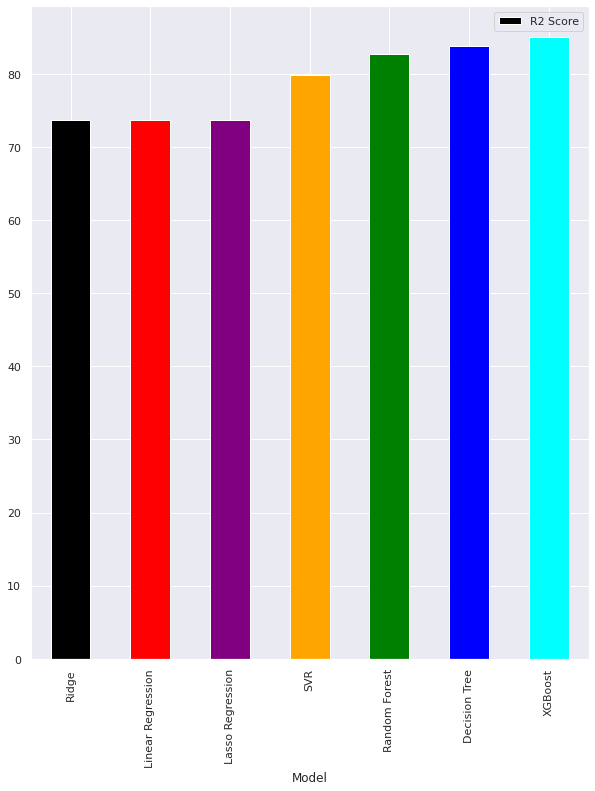

In [ ]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y = "R2 Score" , kind="bar",figsize=(10,12) , color=['black', 'red', 'purple', 'orange', 'green', 'blue', 'cyan'])

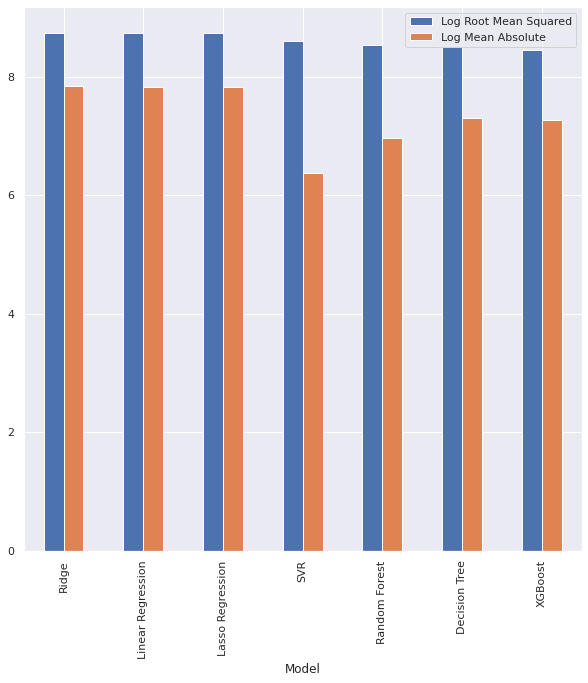

In [ ]:
result_df = result_df.sort_values("R2 Score")
result_df.plot(x = "Model", y=["Log Root Mean Squared", 'Log Mean Absolute'], kind="bar",figsize=(10,10))

In [ ]:
xg_boost_model = XGBRegressor(objective ='reg:squarederror',colsample_bytree = xg_boost_best_params['colsample_bytree'], eta = xg_boost_best_params['eta'], max_depth = xg_boost_best_params['max_depth'], n_estimators = xg_boost_best_params['n_estimators'])

#train model
xg_boost_model.fit(X_train,Y_train)
#print score
xg_boost_model.score(X_test,Y_test)


0.8676192905373652

In [ ]:
!pip install -q shap # Run this if you do not have shap installed
import shap

     |████████████████████████████████| 569 kB 5.5 MB/s 


In [ ]:
!pip install shapash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 902 kB 4.6 MB/s 
     |████████████████████████████████| 22.3 MB 60.4 MB/s 
     |████████████████████████████████| 9.9 MB 51.5 MB/s 
     |████████████████████████████████| 642 kB 46.1 MB/s 
     |████████████████████████████████| 1.0 MB 38.8 MB/s 
     |████████████████████████████████| 216 kB 41.7 MB/s 
     |████████████████████████████████| 357 kB 47.1 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=5456ec9b4e6382d60d5609e332f2bf21d7865551732c15ace339f9d09052971b
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=1edd99a35e29e77aefe2585c1a192fc2db7cdf66ceea36e940ddcc5457946972
  Stored in directory: /root/.cache/pip/wheels/fe/54/53/a8d448db559

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
import shap # v0.39.0
shap.initjs()

In [ ]:
explainer = shap.Explainer(xg_boost_model)
shap_test = explainer(X_test)
print(f"Shap values length: {len(shap_test)}\n")
print(f"Sample shap value:\n{shap_test[0]}")

Shap values length: 268

Sample shap value:
.values =
array([-3183.8308 ,   -90.51795, -1018.0726 ,  -921.9838 , -3638.3337 ,
         186.68982], dtype=float32)

.base_values =
13325.66

.data =
array([23.   ,  0.   , 23.845,  0.   ,  1.   ,  2.   ])


In [ ]:
shap_test[0].base_values

13325.66

In [ ]:
shap_test[0].data

array([23.   ,  0.   , 23.845,  0.   ,  1.   ,  2.   ])

In [ ]:
shap_test[0].values

array([-3183.8308 ,   -90.51795, -1018.0726 ,  -921.9838 , -3638.3337 ,
         186.68982], dtype=float32)

In [ ]:
shap_test.base_values

array([13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325.66,
       13325.66, 13325.66, 13325.66, 13325.66, 13325.66, 13325

In [ ]:
explainer.expected_value

13325.66

In [ ]:
(shap_test.data == X_test).describe()

,age,sex,bmi,children,smoker,region
count,268,268,268,268,268,268
unique,1,1,1,1,1,1
top,True,True,True,True,True,True
freq,268,268,268,268,268,268


In [ ]:
pd.DataFrame(shap_test.data, columns=shap_test.feature_names,
             index=X_test.index)

,age,sex,bmi,children,smoker,region
17,23.0,0.0,23.845,0.0,1.0,2.0
1091,55.0,1.0,29.830,0.0,1.0,2.0
273,50.0,0.0,27.455,1.0,1.0,2.0
270,18.0,0.0,29.370,1.0,1.0,0.0
874,44.0,0.0,21.850,3.0,1.0,2.0
...,...,...,...,...,...,...
232,19.0,1.0,17.800,0.0,1.0,1.0
323,57.0,0.0,40.945,0.0,1.0,2.0
1337,61.0,1.0,29.070,0.0,0.0,3.0
1066,48.0,0.0,37.290,2.0,1.0,0.0


In [ ]:
shap_df = pd.DataFrame(shap_test.values,
                       columns=shap_test.feature_names,
                       index=X_test.index)
shap_df

,age,sex,bmi,children,smoker,region
17,-3183.830811,-90.517952,-1018.072571,-921.983826,-3638.333740,186.689819
1091,4501.778809,42.902229,-1372.247192,-642.924805,-3907.669678,186.426117
273,2100.129883,-43.888962,-654.520142,-125.152176,-3825.809326,127.443161
270,-4380.094238,-62.305954,-1205.463623,136.036407,-3977.694580,-200.561554
874,856.474915,-43.888962,-1291.838989,711.484619,-3761.987305,268.251404
...,...,...,...,...,...,...
232,-4532.789551,58.177708,-1368.318604,-801.665649,-3705.696533,-169.631210
323,4552.236816,-45.434570,1464.528442,-814.110229,-5752.900879,307.641052
1337,6005.904785,11.539899,-5267.523926,-595.054199,14958.439453,-28.430456
1066,1908.447632,-60.912735,1518.366211,874.518372,-5739.738770,-291.918335


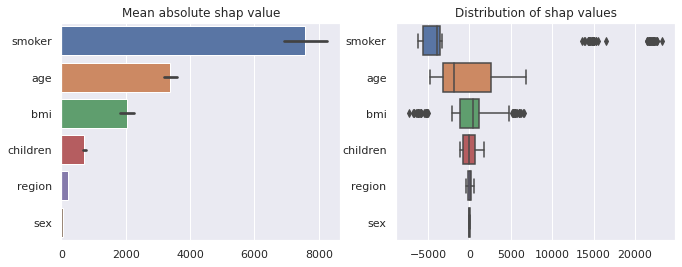

In [ ]:
columns = shap_df.apply(np.abs).mean()\
                 .sort_values(ascending=False).index
fig, ax = plt.subplots(1, 2, figsize=(11,4))
sns.barplot(data=shap_df[columns].apply(np.abs), orient='h',
            ax=ax[0])
ax[0].set_title("Mean absolute shap value")
sns.boxplot(data=shap_df[columns], orient='h', ax=ax[1])
ax[1].set_title("Distribution of shap values");

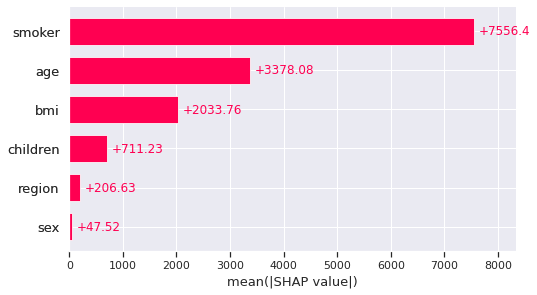

In [ ]:
shap.plots.bar(shap_test)

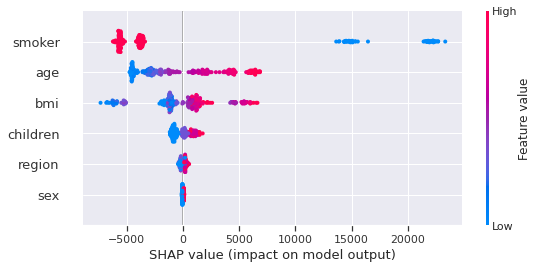

In [ ]:
shap.summary_plot(shap_test)

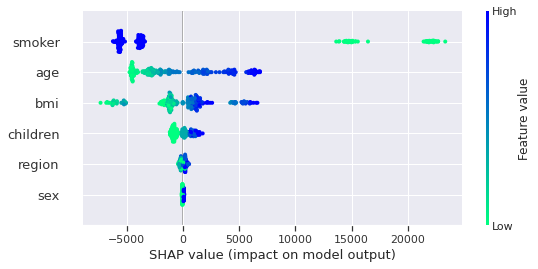

In [ ]:
shap.summary_plot(shap_test, cmap=plt.get_cmap("winter_r"))

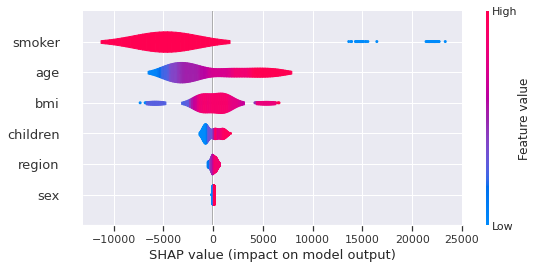

In [ ]:
shap.summary_plot(shap_test, plot_type='violin')

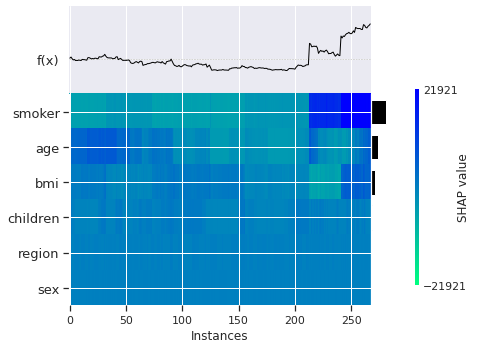

In [ ]:
shap.plots.heatmap(shap_test, cmap=plt.get_cmap("winter_r"))

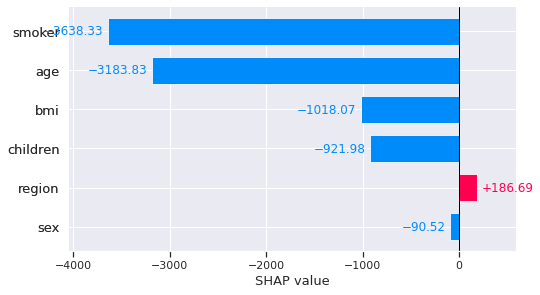

In [ ]:
shap.plots.bar(shap_test[0])